# 02ProvinceCOVID19-V1

# Libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from IPython.display import display

# Load Data

In [2]:
province = pd.read_csv(
    "C:\py\Projects\TuringCollege\COVID19\DataSets\province.csv",
    index_col=False,
    skipinitialspace=True,
)

In [3]:
province["date"] = province["date"].astype("datetime64[ns]")

In [4]:
province = province.drop(["time", "released"], axis=1)

In [5]:
province.rename(
    columns={
       "date": "Date",
        "province": "Province",
        "confirmed": "Confirmed",
        "deceased": "Deceased"
    },
    inplace=True,
)

In [6]:
province.head()

,Date,Province,Confirmed,Deceased
0,2020-01-20,Seoul,0,0
1,2020-01-20,Busan,0,0
2,2020-01-20,Daegu,0,0
3,2020-01-20,Incheon,1,0
4,2020-01-20,Gwangju,0,0


# Confirmed Cases by Province

In [7]:
groupby_province = (
    province[["Province", "Confirmed"]]
    .groupby(["Province"])
    .max()
    .sort_values("Confirmed", ascending=False)
)

groupby_province = groupby_province.reset_index()

In [8]:
groupby_province.query('Confirmed>1000', inplace=True)

In [21]:
# plt.figure(figsize=(10, 10))

# plt.title("Highest Number of Confirmed Cases", fontsize=30, y=1);

# ord_color = "bisque"
# spec_lev1 = "red"

# palette = {
#     "Daegu": spec_lev1,
#     "Gyeongsangbuk-do": ord_color,
#     "Seoul": ord_color,
#     "Gyeonggi-do": ord_color,
# }

# chart = sns.barplot(
#     x="Confirmed",
#     y="Province",
#     ci=None,
#     dodge=False,
#     data=groupby_province,
#     order=groupby_province.sort_values("Confirmed", ascending=False).Province,
#     palette=palette
# )

# plt.xticks(fontsize=25)
# plt.yticks(fontsize=25)
# plt.xlabel("Confirmed", fontsize=25, labelpad=25)
# plt.ylabel("Province", fontsize=25, labelpad=25)

# sns.despine(left=True, bottom=True)
# chart.bar_label(chart.containers[0], size=25);

In [10]:
# chart = province_all.sort_values('Confirmed', ascending=False).plot(
#     kind="bar",
#     stacked=True,
#     color=["crimson", "bisque"],
#     figsize=(20, 10),
# #     log=True
# )

# plt.xticks(fontsize=25)
# plt.yticks(fontsize=25)
# plt.xlabel("Location", fontsize=25, labelpad=25)
# plt.ylabel("Confirmed / Deceased", fontsize=25, labelpad=25)
# plt.legend(loc='upper right', fontsize='30', title_fontsize='30')

# chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment="right")
# # chart.set(ylim=(1000, 6000))
# sns.despine(left=True, bottom=True);

NameError: name 'province_all' is not defined

In [11]:
population_size = {
    "Population": pd.Series(
        [
            3468139,
            2640441,
            9975709,
            13511676,
            2938457,
            2176636,
            3333056,
            1545717,
            1632088,
            1521763,
            1138225,
            353933,
            1526000,
            1797031,
            1788807,
            670858,
            2184528,
        ],
        index=[
            "Busan",
            "Gyeongsangbuk-do",
            "Seoul",
            "Gyeonggi-do",
            "Incheon",
            "Chungcheongnam-do",
            "Gyeongsangnam-do",
            "Daejeon",
            "Chungcheongbuk-do",
            "Gangwon-do",
            "Ulsan",
            "Sejong",
            "Gwangju",
            "Jeollabuk-do",
            "Jeollanam-do",
            "Jeju-do",
            "Daegu"           
        ],
    )
}

population_size = pd.DataFrame(population_size)
population_size.index.names = ['Province']

In [12]:
province_all = (
    province[["Province", "Confirmed", "Deceased"]].groupby(["Province"]).max()
)

In [13]:
df_inner = pd.merge(province_all, population_size, on='Province', how='inner')
df_inner = df_inner [["Population", "Confirmed", "Deceased"]]
df_inner = df_inner.reset_index()

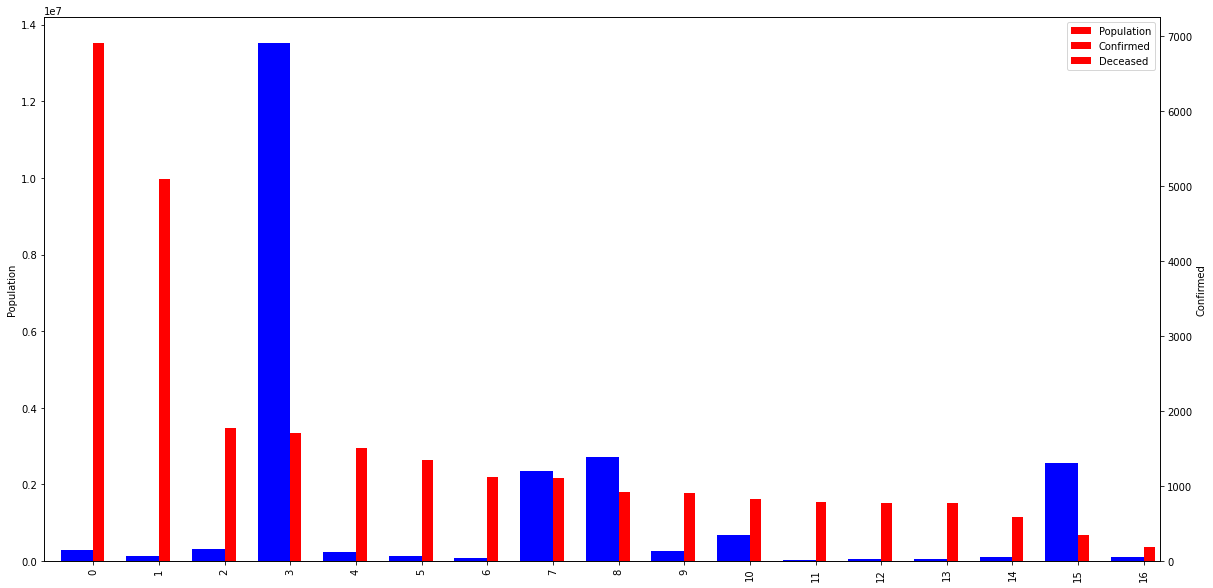

In [20]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111) 
ax2 = ax.twinx() 

width = 0.5

# chart = province_all.sort_values('Confirmed', ascending=False).plot(

df_inner.sort_values('Population', ascending=False).plot(kind='bar', color='red', ax=ax, width=width, position=0)
df_inner.Confirmed.plot(kind='bar', color='blue', ax=ax2, width=width, position=1)

# plt.xticks("Province")
ax.set_ylabel('Population')
ax2.set_ylabel('Confirmed')

plt.show()

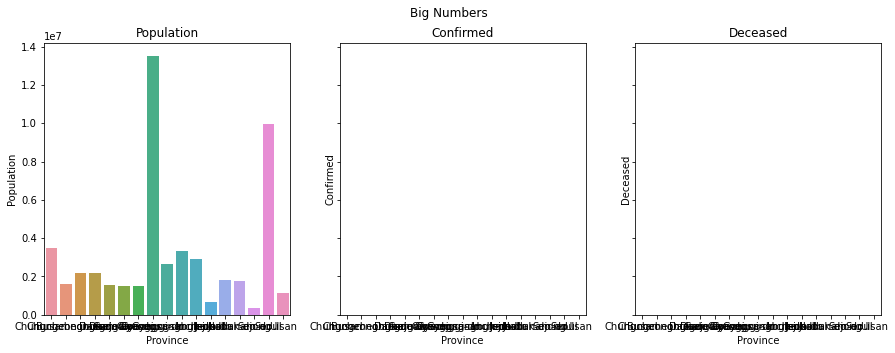

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Big Numbers')

# Bulbasaur
sns.barplot(ax=axes[0], x=df_inner["Province"], y=df_inner["Population"])
axes[0].set_title("Population")


# Charmander
sns.barplot(ax=axes[1], x=df_inner["Province"], y=df_inner["Confirmed"])
axes[1].set_title("Confirmed")


# Squirtle
sns.barplot(ax=axes[2], x=df_inner["Province"], y=df_inner["Deceased"])
axes[2].set_title("Deceased")

plt.show();

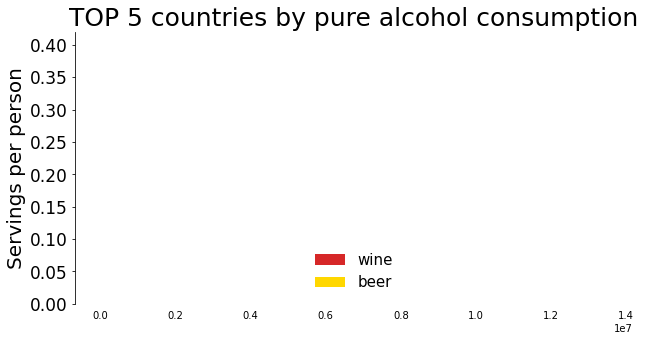

In [16]:
fig, ax = plt.subplots(figsize=(10,5))


width = 0.4

plt.bar(df_inner['Population'],
        width, color='tab:red', label='wine') 
plt.bar(df_inner['Confirmed'],
        width, color='gold', label='beer')


plt.title('TOP 5 countries by pure alcohol consumption', fontsize=25)
plt.xlabel(None)
# plt.xticks(top5_alcohol.index, top5_alcohol['country'], fontsize=17)
plt.ylabel('Servings per person', fontsize=20)
plt.yticks(fontsize=17)
sns.despine(bottom=True)
ax.grid(False)
ax.tick_params(bottom=False, left=True)
plt.legend(frameon=False, fontsize=15)
plt.show()